**Loading and Understanding Data**

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("bank-additional-full.csv")
data.shape

(41188, 22)

In [2]:
data.head()

,customer_no,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Checking if there are any special characters that should be handles as NAs
for col in ['customer_no', 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
            'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'] :
    print('\n', col, ' ----->>')
    for index in range(0, len(data)):
        try :
            skip = float(data.loc[index, col])
        except ValueError :
            print(index, data.loc[index, col])


 customer_no  ----->>

 age  ----->>

 duration  ----->>

 campaign  ----->>

 pdays  ----->>

 previous  ----->>

 emp_var_rate  ----->>

 cons_price_idx  ----->>

 cons_conf_idx  ----->>

 euribor3m  ----->>

 nr_employed  ----->>


In [4]:
def understand_data(data) :
    return(pd.DataFrame({"Datatype":data.dtypes,
                         "No of NAs":data.isna().sum(),
                         "No of Levels":data.apply(lambda x: x.nunique(),axis=0),
                         "Levels":data.apply(lambda x: str(x.unique()),axis=0)}))

In [5]:
# Understanding the given data
understand_data(data)

,Datatype,No of NAs,No of Levels,Levels
customer_no,int64,0,41188,[ 1 2 3 ... 41186 41187 41188]
age,int64,0,78,[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 ...
job,object,0,12,['housemaid' 'services' 'admin.' 'blue-collar'...
marital,object,0,4,['married' 'single' 'divorced' 'unknown']
education,object,0,9,['basic.4y' 'high.school' 'basic.6y' 'basic.9y...
credit_default,object,0,3,['no' 'unknown' 'yes']
housing,object,0,3,['no' 'yes' 'unknown']
loan,object,0,3,['no' 'yes' 'unknown']
contact,object,0,2,['telephone' 'cellular']
contacted_month,object,0,10,['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'ma...


In [6]:
data.shape[0]

41188

In [7]:
data.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

In [8]:
sorted(data.pdays.value_counts().index.values)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 25,
 26,
 27,
 999]

In [9]:
sorted(data['emp_var_rate'].unique())

[-3.4, -3.0, -2.9, -1.8, -1.7, -1.1, -0.2, -0.1, 1.1, 1.4]

**Observations:**


1. customer_no is an ID column -> should be deleted.
2. age is an integer column -> can be binned into categorical
3. job is an object column with 12 levels -> should be converted to categorical
4. marital is an object column with 3 levels and unknown -> unknown should be handled as NaN & marital should be converted to categorical
5. education is an object column with 8 levels and unknown -> unknown should be handled as NaN & education should be converted to categorical
6. credit_default is an object column with 2 levels and unknown -> unknown should be handled as NaN & credit_default should be converted to categorical
7. housing is an object column with 2 levels and unknown -> unknown should be handled as NaN & housing should be converted to categorical
8. loan is an object column with 2 levels and unknown -> unknown should be handled as NaN & loan should be converted to categorical
9. contact is an object column with 2 levels -> should be converted to categorical
10. contacted_month is an object column with 10 levels -> should be converted to categorical
11. day_of_week is an object column with 5 levels -> should be converted to categorical
12. In pdays majority of the records have pdays as 999 -> 999 should be treated as NaN & Nan should be imputed with mean/median values
13. poutcome is an object column with 3 levels -> should be converted to categorical
14. y - the target column is an object column with 2 levels -> should be converted to categorical & do label encoding to convert no to 0 and yes to 1

In [10]:
# Deleting unwanted columns
def delete_unwanted_columns(data, col_list):
    data.drop(col_list, axis = 1, inplace = True)
    return data

In [11]:
print("Before dropping the {} column(s), there are {} columns".format(['customer_no'],data.shape[1]))
data = delete_unwanted_columns(data, ['customer_no'])
print("After deletion the {} column(s), there are {} columns".format(['customer_no'],data.shape[1]))

Before dropping the ['customer_no'] column(s), there are 22 columns
After deletion the ['customer_no'] column(s), there are 21 columns


<AxesSubplot:>

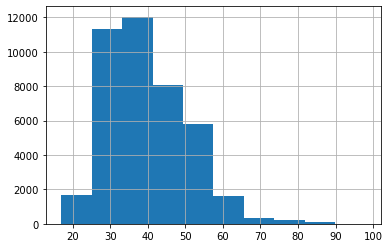

In [16]:
data.age.hist()